In [15]:
import nltk
import string
import csv
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Ensure NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')  # for lemmatization
nltk.download('punkt')  # for tokenization

# Initialize NLTK components
tweetTokeniser = nltk.tokenize.TweetTokenizer()
tweetLemmatizer = WordNetLemmatizer()
lPunct = list(string.punctuation)
lStopwords = stopwords.words('english') + lPunct + ['via']

# Define irrelevant terms to filter out
irrelevant_terms = {'im', 'i\'m', 'one', 'tri', 'thi', 'ani', 'it', 'it\'', 'ha', 'one', 'also', 'ab', 'get', 'thank', 
                    'go', 'ask', 'think', 'like','feel', 'would','wa', '...', '..', '<br>', 'href', '</a>', '“', '”', 'u', '❤', '😂', '<3', '>', '<', '.', ',', '!', '@', '#', '$', '%', '^', '&', '*',
        '(', ')', 'you', 'i', 'the', 'is', 'a', 'that', 'it', 'to', 'and', 'of', 'in',
        'for', 'on', 'with', 'as', 'are', 'this', 'was', 'by', 'at', 'be', 'but',
        'not', 'from', 'an', 'or', 'which', 'that', 'we', 'so', 'if', 'they', 'he',
        'she', 'their', 'my', 'his', 'her', 'its', 'there', 'when', 'who', 'what',
        'where', 'how', 'than', 'then', 'because', 'more', 'like', 'these', 'just'}


# Load CSV file
# Load CSV file
fCsvName = 'Q1/western_stereotype_videos.csv'

# Set the number of common terms to display
freqNum = 50

# Text preprocessing function
def processText(text, tokenizer, lemmatizer, stopwords):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    lTokens = tokenizer.tokenize(text)
    # Strip whitespaces
    lTokens = [token.strip() for token in lTokens]
    # Lemmatize the tokens
    lLemmatizedTokens = [lemmatizer.lemmatize(tok) for tok in lTokens]
    # Remove stopwords and digits
    return [tok for tok in lLemmatizedTokens if tok not in stopwords and not tok.isdigit()]

# Initialize term frequency counter
termFreqCounter = Counter()
processedPosts = []

# Process CSV file
with open(fCsvName, 'r', newline='', encoding='utf-8') as f:
    csv_reader = csv.DictReader(f)
    
    for submission in csv_reader:
        # Process Video Title
        videoTitle = submission.get('Video Title', '')
        videoTitle = re.sub(u"(\u2018|\u2019|\u2014)", "", videoTitle)  # Remove special characters
        lTokens = processText(text=videoTitle, tokenizer=tweetTokeniser, lemmatizer=tweetLemmatizer, stopwords=lStopwords)
        filteredTokens = [token for token in lTokens if token not in irrelevant_terms]
        termFreqCounter.update(filteredTokens)
        processedPosts.append(" ".join(filteredTokens)) 
        
        # Process Description
        description = submission.get('Description', '')
        description = re.sub(u"(\u2018|\u2019|\u2014)", "", description)
        lTokens = processText(text=description, tokenizer=tweetTokeniser, lemmatizer=tweetLemmatizer, stopwords=lStopwords)
        filteredTokens = [token for token in lTokens if token not in irrelevant_terms]
        termFreqCounter.update(filteredTokens)
        processedPosts.append(" ".join(filteredTokens)) 
        
        # Process Comments
        comments = submission.get('Comments', '')
        comments = re.sub(u"(\u2018|\u2019|\u2014)", "", comments)
        lTokens = processText(text=comments, tokenizer=tweetTokeniser, lemmatizer=tweetLemmatizer, stopwords=lStopwords)
        filteredTokens = [token for token in lTokens if token not in irrelevant_terms]
        termFreqCounter.update(filteredTokens)
        processedPosts.append(" ".join(filteredTokens)) 

# Print the top 50 most common terms
print(f"The top {freqNum} most common terms are:\n")
for term, freq in termFreqCounter.most_common(freqNum):
    print(f"{term}: {freq}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The top 50 most common terms are:

people: 673
woman: 586
video: 337
look: 330
white: 327
girl: 275
black: 269
beauty: 268
thing: 262
even: 257
make: 252
love: 250
time: 246
men: 235
really: 233
skin: 233
way: 228
see: 221
much: 219
always: 207
good: 207
know: 205
say: 185
want: 182
dark: 176
name: 174
race: 173
beautiful: 162
dont: 160
need: 159
mean: 153
character: 152
life: 152
indian: 152
standard: 150
never: 149
still: 146
world: 145
person: 142
medium: 137
different: 137
many: 131
lot: 128
made: 123
movie: 123
well: 121
year: 121
️: 119
child: 117
kid: 115


In [2]:
print(f"Processing Video Title: {videoTitle}")
print(f"Processing Description: {description}")
print(f"Processing Comments: {comments}")


Processing Video Title: Beauty Standards Always Win...
Processing Description: Personalized step-by-step beauty advice: https://www.qoves.com/services/ Follow the brand across platforms for new content: ...
Processing Comments: HHAHAHA the gall of her to include &quot;being fatter&quot; in the list of traits alongside being shorter, darker and ethnic features as to what makes people beautiful. <br>Legit disgusting, literally 99.9999% of people on this earth knows that&#39;s not true, that when they lose weight they&#39;re treated better. And she jumps to considering plastic surgery already without considering other ways to be prettier. She just screams, &quot;I wanna be pretty but don&#39;t wanna do anything&quot; <br>Boring fucking person; The reconstructed faces are unrealistic. Its the the product of forensic artists trying to give the people that have been found an ancient/prehistoric look. Ancient Europeans looked exactly like Europeans today. The picture of Russia for example can

In [13]:
with open(fCsvName, 'r', newline='', encoding='utf-8') as f:
    csv_reader = csv.DictReader(f)

    for submission in csv_reader:
        
        # Process Video Title
        videoTitle = submission.get('Video Title', '')
        videoTitle = re.sub(u"(\u2018|\u2019|\u2014)", "", videoTitle)  # Remove special characters
        lTokens = processText(text=videoTitle, tokenizer=tweetTokeniser, lemmatizer=tweetLemmatizer, stopwords=lStopwords)
        filteredTokens = [token for token in lTokens if token not in irrelevant_terms]
        termFreqCounter.update(filteredTokens)
        processedPosts.append(" ".join(filteredTokens)) 
        

# Save preprocessed posts to a new CSV file
with open('preprocessed_western_stereotype__data.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Processed Text'])  # Header
    for post in processedPosts:
        writer.writerow([post])

# Save term frequency counts to a CSV file
term_freq_df = pd.DataFrame(termFreqCounter.most_common(), columns=['Term', 'Frequency'])
term_freq_df.to_csv('preprocessed_western_stereotype_term_frequencies.csv', index=False)

print(f"Processed posts saved to 'preprocessed_racial_beauty_data.csv'.")
print(f"Term frequency data saved to 'term_frequencies.csv'.")

Processed posts saved to 'preprocessed_racial_beauty_data.csv'.
Term frequency data saved to 'term_frequencies.csv'.


In [21]:
# import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure NLTK resources are available
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Cleans the input text by lowering the case, removing URLs and punctuation, and lemmatizing."""
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove non-alphanumeric characters
        text = re.sub(r'\W', ' ', text)
        # Tokenize, lemmatize, and remove stop words
        tokens = text.split()
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
        # Join the tokens back into a string
        return ' '.join(tokens)
    return text  # Return unchanged if text is not a string

def preprocess_file(input_filename, output_filename):
    """
    Reads a CSV file, preprocesses the relevant fields, and saves the cleaned data to a new CSV file.

    Args:
        input_filename (str): The name of the input CSV file.
        output_filename (str): The name of the output CSV file to save the cleaned data.
    """
    # Load data from the input CSV file
    data = pd.read_csv(input_filename)

    # Preprocess the 'Video Title' column
    data['Video Title'] = data['Video Title'].apply(preprocess_text)

    # Preprocess the 'Description' column
    data['Description'] = data['Description'].apply(preprocess_text)

    # Preprocess comments (assuming comments are in a 'Comments' column, adjust if differently named)
    if 'Comments' in data.columns:
        data['Comments'] = data['Comments'].apply(preprocess_text)

    # Save the cleaned data to a new CSV file
    data.to_csv(output_filename, index=False, encoding='utf-8')

# Example usage
input_file = 'Q1/asian_stereotype_youtube_videos.csv'  # Corrected input file path
output_file = 'Q1/asian_stereotype_youtube_videos_cleaned.csv'  # Specify the output file name here

preprocess_file(input_file, output_file)

print(f"Cleaned data saved to '{output_file}'.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaned data saved to 'Q1/asian_stereotype_youtube_videos_cleaned.csv'.


In [25]:
import pandas as pd

# Load the data
data = pd.read_csv('Q1/asian_stereotype_youtube_videos_cleaned.csv')  # Update with the correct path to your CSV file

# Print the column names to see what's available in your DataFrame
print(data.columns)


Index(['Video Title', 'Channel', 'Published Date', 'Description', 'Video ID',
       'Comments'],
      dtype='object')


In [111]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Ensure required NLTK resources are available
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
# Optionally, add more custom stop words
custom_stop_words = ['br', 'quot', 'amp', 'nbsp', 'like', 'people', 'comment' ,'href', 'video','im', 'asian', 'kpop', 'look', 'korean','korea']  # common HTML entities and other non-informative terms
stop_words.update(custom_stop_words)

def preprocess_text(text):
    """Cleans the input text by lowering the case, removing URLs, HTML entities, non-alphanumeric characters, numbers, and punctuation, and lemmatizing."""
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'&lt;/?.*?&gt;', ' ', text)  # Remove HTML tags
        text = re.sub(r'\d+', ' ', text)  # Remove numbers
        text = re.sub(r'\W', ' ', text)  # Remove non-alphanumeric characters
        tokens = text.split()
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
        return ' '.join(tokens)
    return ""


def preprocess_and_save(input_filename, output_filename):
    data = pd.read_csv(input_filename)
    # Combine text from Video Title, Description, and Comments
    data['Combined_Text'] = data['Video Title'].fillna('') + ' ' + data['Description'].fillna('') + ' ' + data['Comments'].fillna('')
    data['Cleaned_Combined_Text'] = data['Combined_Text'].apply(preprocess_text)
    data.to_csv(output_filename, index=False)

input_file = 'Q1/western_stereotype_youtube_videos.csv'  # adjust this path
output_file = 'Q1/unrealistic_western_stereotype_videos_cleaned.csv'  # adjust this path

# Preprocess and save
preprocess_and_save(input_file, output_file)

# Load the processed data and extract term frequencies
def extract_term_frequencies(file_path):
    data = pd.read_csv(file_path)
    vectorizer = CountVectorizer()
    counts = vectorizer.fit_transform(data['Cleaned_Combined_Text'].dropna())
    term_frequencies = counts.sum(axis=0)
    terms = vectorizer.get_feature_names_out()
    frequencies = term_frequencies.tolist()[0]
    term_freq_df = pd.DataFrame(list(zip(terms, frequencies)), columns=['Term', 'Frequency'])
    term_freq_df = term_freq_df.sort_values(by='Frequency', ascending=False)
    return term_freq_df

# Extract and display term frequencies
term_freq_df = extract_term_frequencies(output_file)
print(term_freq_df.head(50))  # Adjust the number to view more terms


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


           Term  Frequency
721      beauty        580
8941      woman        533
7617   standard        463
7356       skin        432
3329        get        423
8086      think        390
925        body        381
718   beautiful        378
5654        one        363
4875       make        362
2726       even        342
2862       face        318
6556     really        316
3351       girl        315
7853    surgery        295
4800       love        291
2968       feel        285
5515       nose        279
8749       want        278
4502       know        265
5278       much        264
285        also        261
7081        see        259
8986      would        258
3407       good        256
8085      thing        252
5438      never        252
8784        way        252
8153       time        250
5050        men        241
5399       need        240
4769       look        235
296      always        225
8814     weight        220
9039       year        219
6994        say        204
4

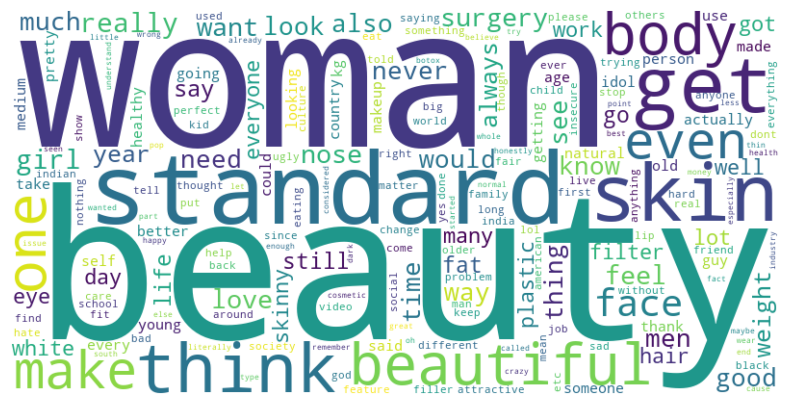

In [113]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'term_freq_df' is your DataFrame containing terms and frequencies
term_freq_dict = dict(zip(term_freq_df['Term'], term_freq_df['Frequency']))

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud from frequencies
wordcloud.generate_from_frequencies(term_freq_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.savefig('Q1/wordcloud_Western')
plt.show()


Preprocessing for Q2 Json

In [14]:
import json
import pandas as pd
import re
import nltk
import string
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Ensure NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize NLTK components
tweet_tokenizer = TweetTokenizer()
tweet_lemmatizer = WordNetLemmatizer()
lStopwords = stopwords.words('english') + list(string.punctuation)

# Define the process_text function
def process_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)  # Removes any HTML tags
    text = text.lower()
    text = re.sub(u"(\u2018|\u2019|\u2014)", "", text)  # Remove special characters
    tokens = tweet_tokenizer.tokenize(text)
    lemmatized_tokens = [tweet_lemmatizer.lemmatize(tok) for tok in tokens if tok not in lStopwords and not tok.isdigit()]
    return ' '.join(lemmatized_tokens)

# Load the JSON file
with open('Q2/asian_youtube.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Initialize a DataFrame for storing nodes
nodes = []

# Process each video entry
for entry in data:
    # Example fields: adjust based on your JSON structure
    video_id = entry.get('video_id', '')
    title = entry.get('title', '')
    description = entry.get('description', '')
    comments = entry.get('comments', [])

    # Clean and process text fields
    title_cleaned = process_text(title)
    description_cleaned = process_text(description)

    # Create a node for the video
    nodes.append({
        'id': video_id,
        'type': 'video',
        'title': title_cleaned,
        'description': description_cleaned,
    })

    # Process comments
    for comment in comments:
        comment_text = comment.get('text', '')
        comment_cleaned = process_text(comment_text)

        # Create a node for each comment
        nodes.append({
            'id': f"{video_id}_comment_{comment.get('author_id', 'unknown')}",
            'type': 'comment',
            'video_id': video_id,
            'author': comment.get('author', ''),
            'text': comment_cleaned,
        })

# Convert to DataFrame for easier manipulation
nodes_df = pd.DataFrame(nodes)

# Define the output file name
output_csv_file = 'asian_cleaned_nodes_for_icm.csv'

# Save the DataFrame to a CSV file
nodes_df.to_csv(output_csv_file, index=False, encoding='utf-8')

print(f"Cleaned nodes saved to {output_csv_file}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaned nodes saved to asian_cleaned_nodes_for_icm.csv


In [16]:
import json
import pandas as pd
import re
import nltk
import string
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Ensure NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize NLTK components
tweet_tokenizer = TweetTokenizer()
tweet_lemmatizer = WordNetLemmatizer()
lStopwords = stopwords.words('english') + list(string.punctuation)

# Define the process_text function
def process_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)  # Removes any HTML tags
    text = text.lower()
    text = re.sub(u"(\u2018|\u2019|\u2014)", "", text)  # Remove special characters
    tokens = tweet_tokenizer.tokenize(text)
    lemmatized_tokens = [tweet_lemmatizer.lemmatize(tok) for tok in tokens if tok not in lStopwords and not tok.isdigit()]
    return ' '.join(lemmatized_tokens)

# Load the JSON file
with open('Q2/western_youtube.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Initialize a DataFrame for storing nodes
nodes = []

# Process each video entry
for entry in data:
    # Example fields: adjust based on your JSON structure
    video_id = entry.get('video_id', '')
    title = entry.get('title', '')
    description = entry.get('description', '')
    comments = entry.get('comments', [])

    # Clean and process text fields
    title_cleaned = process_text(title)
    description_cleaned = process_text(description)

    # Create a node for the video
    nodes.append({
        'id': video_id,
        'type': 'video',
        'title': title_cleaned,
        'description': description_cleaned,
    })

    # Process comments
    for comment in comments:
        comment_text = comment.get('text', '')
        comment_cleaned = process_text(comment_text)

        # Create a node for each comment
        nodes.append({
            'id': f"{video_id}_comment_{comment.get('author_id', 'unknown')}",
            'type': 'comment',
            'video_id': video_id,
            'author': comment.get('author', ''),
            'text': comment_cleaned,
        })

# Convert to DataFrame for easier manipulation
nodes_df = pd.DataFrame(nodes)

# Define the output file name
output_csv_file = 'western_cleaned_nodes_for_icm.csv'

# Save the DataFrame to a CSV file
nodes_df.to_csv(output_csv_file, index=False, encoding='utf-8')

print(f"Cleaned nodes saved to {output_csv_file}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaned nodes saved to western_cleaned_nodes_for_icm.csv
